Your name:  Ben Zito

Class ID:  CSC484
    

## HM1: Practice K-NN
    0. Understand this notebook first
    1. Implement the k-NN algorithm for comparison 
    2. Do not use the built-in k-NN from sk-learn (you can use it for comparison purpose only)  
    3. Housing dataset is given separately  
    4. Test your code inside the this notebook (in step 2.1)
    5. Summarize your observations briefly
    6. Submit your hw1 notebook.ipynb online 
    7. Due by Feb. 6, Midnight.
    
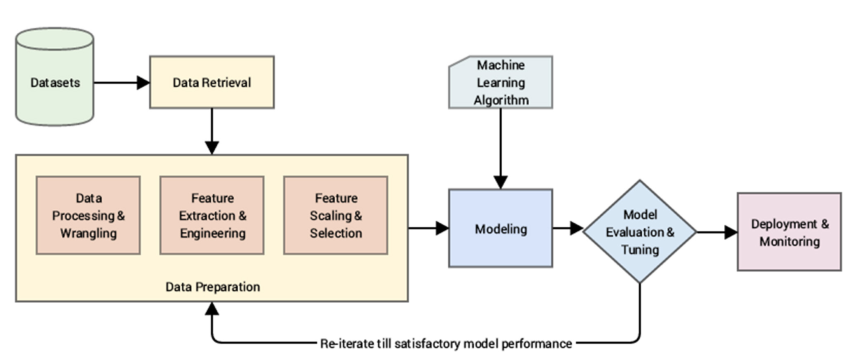

# Chapter 2: ML END to END EXAMPLE

**0. Explor Data**  

**1. Prepare the Data for Machine Learning Algorithms**
  - data cleaning, fillin missing values (in this example)
  - categorical -> one-hot
  - feature selection
  - scaling data


**2. Find models for your machine learning**
  - Linear
  - DT
  - Forest
  -------------
  
**3. Analyze the Best Models and Their Errors**
    
    summarize your observations

    it the model is not good enough, go back step 2 (features, models, parameter tuning, ..)

    also evaluate the best model of Your System on the Test Set

**4. (skip)Launch, Monitor, and Maintain Your System**

-----


In [1]:
## if you have not installed pandas, you need to install pandas

## !pip install pandas

# import pandas
import pandas as pd

# STEP 0. Data Exploration

In [2]:
# for simpification, data is saved in local machine
housing = pd.read_csv("housing.csv")

In [3]:
# check the first 5 lines
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [4]:
# check how many rowsxcol
housing.shape

(20640, 10)

In [5]:
# chech data types
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# statistics
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
# check missing values
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
# check duplicated rows
housing.duplicated().sum()

0

In [9]:
# check the categorical data
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

# (1) ploting

In [10]:
# only for the first time if you did not have it installled
#! pip install matplotlib

In [11]:
# rendering to display in Jupyter 
%matplotlib inline 

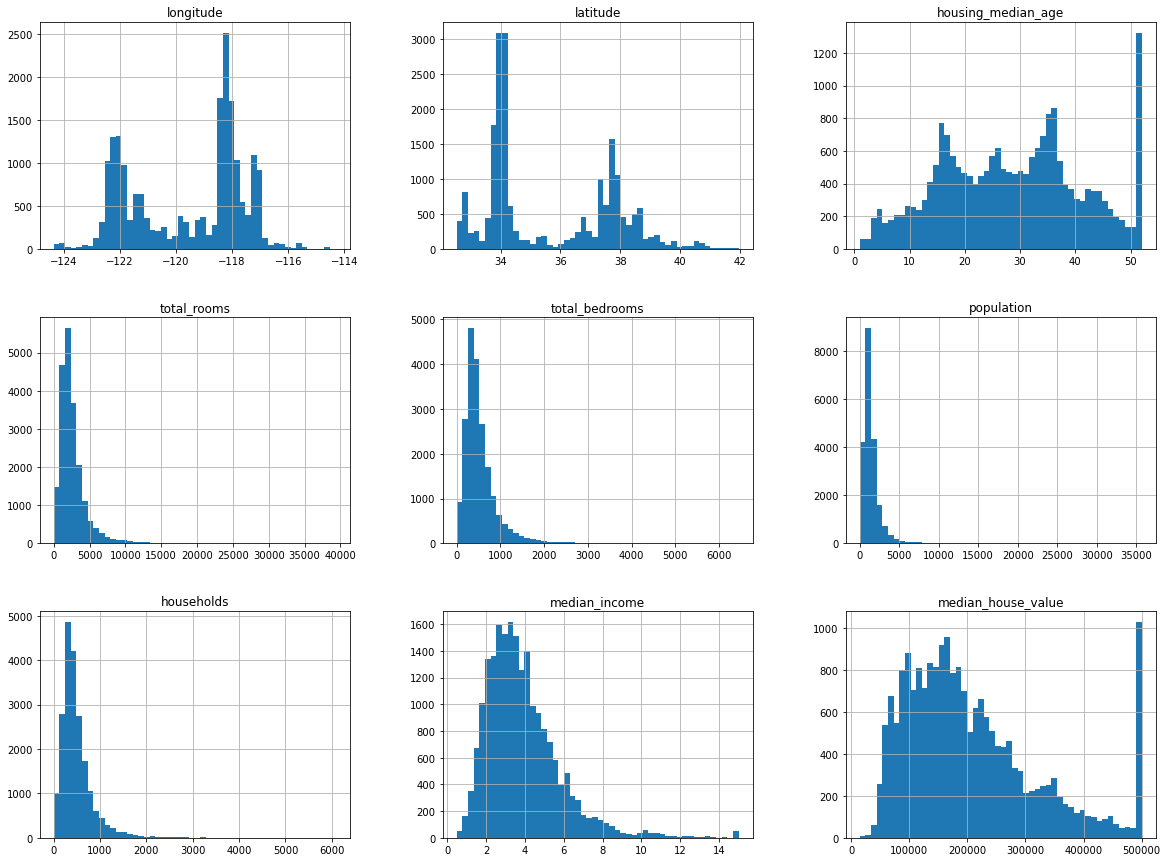

In [12]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

# Vizualization 

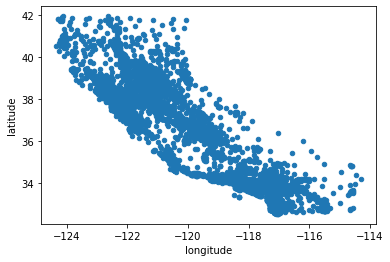

In [13]:
# simple scater
housing.plot(kind="scatter", x="longitude", y="latitude")
plt.show()
# California

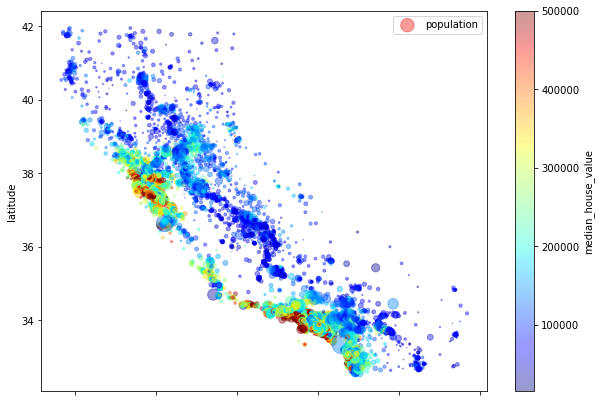

In [14]:
# Next : heatmap-like
# The radius of each circle represents the district’s population (option s), 
# The color represents the price (option c). 
# We will use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices)

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
plt.show()

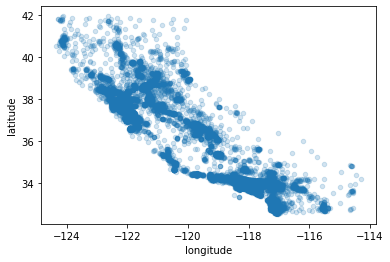

In [15]:
# transparency: alpha in the (0, 1)
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2) # transparent: alpha
plt.show()

In [16]:
#Looking for Correlations:
# for ML, keep only the important features
corr_matrix = housing.corr()

### Looking for Correlations

In [17]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

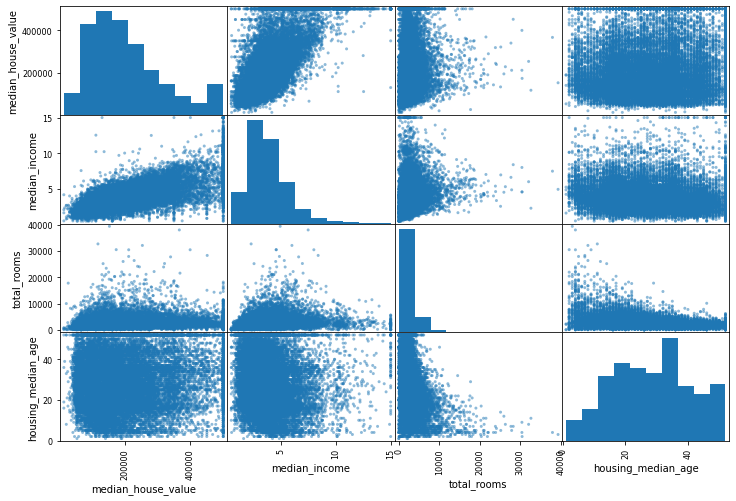

In [18]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

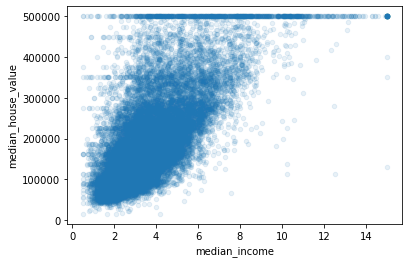

In [19]:
# one-one plot
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.show() 

# STEP 1. Prepare the Data for Machine Learning Algorithms

### Experimenting with Attribute Combinations

In [20]:
# Experimenting with Attribute Combinations
# What you really want is the number of rooms per household

housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
corr_matrix = housing.corr()

In [21]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

### not bad! The new bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms or bedrooms.

In [22]:
#  the y is considered as label ( y = median_house_value)
labels = housing["median_house_value"].copy()
labels

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [23]:
# X for training, drop the dependant variable (y = median_house_value)
houses = housing.drop("median_house_value", axis=1)
houses.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,6.281853,0.172096,2.181467


### 1.1 Data Cleaning:   missing values
 **fill out missing values by median**

In [24]:
# Three options, inplace = False for test

# option 1: Get rid of the whole attribute.
#houses.drop("total_bedrooms", axis=1)

# option 2: Get rid of the corresponding districts with dropna()
#houses.dropna(subset=["total_bedrooms"])

# option 3: Set the values to some value (zero, the mean, the median, etc.)
# there are two columns that have missing values.
median_1 = houses["total_bedrooms"].median() 
houses["total_bedrooms"].fillna(median_1, inplace=True)

median_2 = houses["bedrooms_per_room"].median() 
houses["bedrooms_per_room"].fillna(median_2, inplace=True)

# check again
houses.isna().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

### 1.2 Handling Text and Categorical Attributes

In [25]:
# check the categorical values: first 10
houses_cat = houses[["ocean_proximity"]]
houses_cat.head(10)

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY
8,NEAR BAY
9,NEAR BAY


In [26]:
# count all distinct values.
houses_cat.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [27]:
# missing values
houses_cat.isna().sum()

ocean_proximity    0
dtype: int64

### Convert these categories from text to numbers. 
 - use Scikit-Learn’s OrdinalEncoder class
 - bad choice: data is not ordinal, but 


In [28]:
# from sklearn.preprocessing import OrdinalEncoder

# ordinal_encoder = OrdinalEncoder()
# houses_cat_encoded = ordinal_encoder.fit_transform(houses_cat)

# houses_cat_encoded[:3]  # the first 

### Convert to 1-hot variable

there are total 5 categories: 
1-hot example:

1H OCEAN: [1 0 0 0 0]  
NEAR OCEAN[0 0 0 0 1]  
INLAND    [0 1 0 0 0]  

In [29]:
# use one-hot encoder
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
houses_cat_1hot = cat_encoder.fit_transform(houses_cat)
type(houses_cat_1hot) # matrix in scipy

# change to numpy array.
type(houses_cat_1hot.toarray() ) 


# or change to data frame
one_hot =  pd.DataFrame(houses_cat_1hot.toarray())

one_hot.head()

,0,1,2,3,4
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [30]:
# add column names: 1h, inland, island, near bay, near ocean
one_hot.columns =['<1H OCEAN', 'INLAND', "ISLAND", "NEAR BAY","NEAR OCEAN"] 
one_hot.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [31]:
# Merge the numberical + one-hot then drop the "ocean_proximity  which is not needed"
houses_num = houses.join(one_hot)
houses_num.drop("ocean_proximity", axis = 1, inplace=True) 
houses_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,0.146591,2.555556,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,0.155797,2.109842,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,0.129516,2.802260,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,0.184458,2.547945,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,0.172096,2.181467,0.0,0.0,0.0,1.0,0.0


## 1.3  Feature Selectin:
BASED ON THE CORRELATION AFTER FEATURE COMBINATION OPERATION, WE KEEP ONLY THE MOST IMPORTANT FEATURES
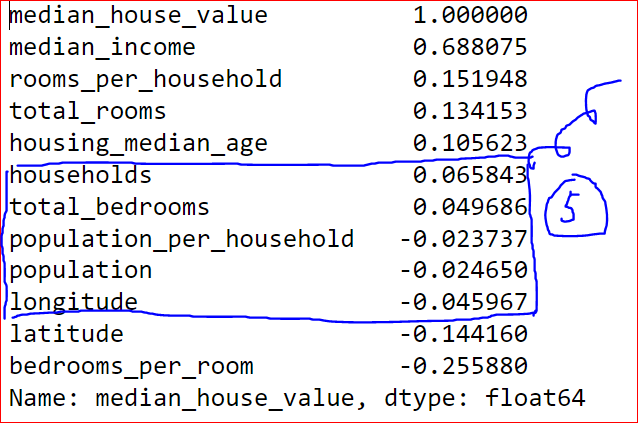

In [32]:
# work on the houses all numerical data. Some features are less important 

# eliminate: households, total_bedrooms, population_per_household, population, and longtitude 
houses_num.drop(["households", "total_bedrooms", "population_per_household", "population","longitude"], axis = 1, inplace = True) 

# check
print(houses_num.shape)
houses_num.head()

(20640, 11)


,latitude,housing_median_age,total_rooms,median_income,rooms_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,37.88,41.0,880.0,8.3252,6.984127,0.146591,0.0,0.0,0.0,1.0,0.0
1,37.86,21.0,7099.0,8.3014,6.238137,0.155797,0.0,0.0,0.0,1.0,0.0
2,37.85,52.0,1467.0,7.2574,8.288136,0.129516,0.0,0.0,0.0,1.0,0.0
3,37.85,52.0,1274.0,5.6431,5.817352,0.184458,0.0,0.0,0.0,1.0,0.0
4,37.85,52.0,1627.0,3.8462,6.281853,0.172096,0.0,0.0,0.0,1.0,0.0


## 1.4 Scaling 
 - Normalization: [0, 1]   
 or  
 - Standardization: N(0, 1)

In [33]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# houses_num = scaler.fit_transform(houses_num)
# houses_num

# # change to normalization [0, 1]
houses_num = houses_num.apply(lambda x: (x-x.min())/(x.max() - x.min() ) )
houses_num.head()

,latitude,housing_median_age,total_rooms,median_income,rooms_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.567481,0.784314,0.022331,0.539668,0.043512,0.051768,0.0,0.0,0.0,1.0,0.0
1,0.565356,0.392157,0.180503,0.538027,0.038224,0.061996,0.0,0.0,0.0,1.0,0.0
2,0.564293,1.000000,0.037260,0.466028,0.052756,0.032796,0.0,0.0,0.0,1.0,0.0
3,0.564293,1.000000,0.032352,0.354699,0.035241,0.093843,0.0,0.0,0.0,1.0,0.0
4,0.564293,1.000000,0.041330,0.230776,0.038534,0.080107,0.0,0.0,0.0,1.0,0.0


In [34]:
labels.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

# Step 2. Select and Train Model
 - regression: for continuous values
 


## This notebook is not total consistent with book code:
   -  we should do the split by now
   
   - the reason is that we need to keep the test/train with same scale and features
  
   - otherwise, we should do the same for the testing data (feature selection and scaling )

### split data into training vs testing datasets
 two options for splitting:
    (1) your own code 
    (2) use sklearn lib and stratified sampling.


## 2.0 Spliting data into training and testing (80/20)

In [35]:
# # use whole datasets for ML
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(houses_num, labels, test_size=0.2, random_state=42)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


In [36]:
# # use half of the data for speeding up.
from sklearn.model_selection import train_test_split

houses_num_half, _, labels_half, _ = train_test_split(houses_num, labels,  test_size=0.50, random_state = 0) 
X_train, X_test, y_train, y_test = train_test_split(houses_num_half, labels_half, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8256, 11) (2064, 11) (8256,) (2064,)


----

## 2.1. For different models:  
 - Training and Evaluating on the Training Set 
 - Testing on the Testing set, compare the prediction value and the real price
 - Checking the error (MSE or RMSE)

## (0)  K-NN 
###  <span class="mark">Homework 1: Find the housing value using K-nearest neighbors</span> :
 - You have X_tain, y_train, X_test, y_test subsets of data for ML.
 
 
 Then follow the following steps:
 
      (1) (5 points) 
             - Make a copy of each training subsets to avoid the sharing address problem.
             - Check (a) shape, (b) info, (c) data types of all training subsets, and (d) first 5 samples;  
    
    
      (2) (10  points)
         - Create a function used to calculate average price of k-NN's in the training subset  for any given sample  and k
         - Test a sample from test subset and comparing with real price, given k = 5
          

      (3) (10 points) 
         - Create a function used to find root mean squared-error for all X_test samples, k = 5

      (4) (5 points) This loop will take a while to get output.
         - run a loop to find the best k using k in range(1, 31, 5)
      
      (5) (5 points) 
         - Compare with built-in knn model and plot the rmse ~ k

      (6) (5 points) 
         - write a short summary of your observation after comparing with given algorithms (Linear, Decision Tree, Random Forest)         

 ---- 
 hint:  use subsets of them for quick responses   


In [37]:
# (1) Make a copy of given data to avoid sharing address problem. 
# do not change X_train, y_train, X_test, y_test because they are used by other algorithms later
import pandas as pd  
import math
from scipy.spatial import distance
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
 

    
#making copies of given arrays
x_train1=X_train
y_train1=y_train
x_test1=X_test
y_test1=y_test
    
    
    

    
    
    
    
    

In [38]:
# (1)(a) Check shape of subsets
print(x_train1.shape, x_test1.shape, y_train1.shape, y_test1.shape)

(8256, 11) (2064, 11) (8256,) (2064,)


In [39]:
# (1)(b) Check mean/standarization
print("x_train's mean:\n"+str(x_train1.mean())+"\n\n\nx_test's mean:\n"+str(x_train1.mean())+"\n\n\ny_train's mean:\n"+str(y_train1.mean())+"\n\n\ny_test's mean:\n"+str(y_test1.mean()))

x_train's mean:
latitude               0.328851
housing_median_age     0.541503
total_rooms            0.067844
median_income          0.233538
rooms_per_household    0.032500
bedrooms_per_room      0.124994
<1H OCEAN              0.443556
INLAND                 0.310804
ISLAND                 0.000242
NEAR BAY               0.115552
NEAR OCEAN             0.129845
dtype: float64


x_test's mean:
latitude               0.328851
housing_median_age     0.541503
total_rooms            0.067844
median_income          0.233538
rooms_per_household    0.032500
bedrooms_per_room      0.124994
<1H OCEAN              0.443556
INLAND                 0.310804
ISLAND                 0.000242
NEAR BAY               0.115552
NEAR OCEAN             0.129845
dtype: float64


y_train's mean:
207684.27725290696


y_test's mean:
204814.97044573643


In [40]:
# (1)(c) Check data types of training subsets
print("x_train's datatypes:")
print(x_train1.dtypes)
print("\n\n\n")
print("x_test's datatypes:")
print(x_test1.dtypes)
print("\n\n\n")
print("y_train's datatype:")
print(y_train1.dtype)
print("\n\n\n")
print("y_test's datatype:")
print(y_test1.dtype)

x_train's datatypes:
latitude               float64
housing_median_age     float64
total_rooms            float64
median_income          float64
rooms_per_household    float64
bedrooms_per_room      float64
<1H OCEAN              float64
INLAND                 float64
ISLAND                 float64
NEAR BAY               float64
NEAR OCEAN             float64
dtype: object




x_test's datatypes:
latitude               float64
housing_median_age     float64
total_rooms            float64
median_income          float64
rooms_per_household    float64
bedrooms_per_room      float64
<1H OCEAN              float64
INLAND                 float64
ISLAND                 float64
NEAR BAY               float64
NEAR OCEAN             float64
dtype: object




y_train's datatype:
float64




y_test's datatype:
float64


In [41]:
#(1)(d) check first 5 samples
x_train1.head()

,latitude,housing_median_age,total_rooms,median_income,rooms_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8533,0.143464,0.647059,0.044204,0.252086,0.026895,0.136015,1.0,0.0,0.0,0.0,0.0
13046,0.641870,0.470588,0.009970,0.119522,0.027653,0.153976,0.0,1.0,0.0,0.0,0.0
11791,0.672689,0.372549,0.079251,0.379312,0.036590,0.067066,0.0,1.0,0.0,0.0,0.0
9064,0.226355,0.078431,0.313215,0.211949,0.026901,0.155278,0.0,1.0,0.0,0.0,0.0
16929,0.534538,0.627451,0.086017,0.188177,0.024253,0.157801,0.0,0.0,0.0,0.0,1.0


In [42]:
x_test1.head()

,latitude,housing_median_age,total_rooms,median_income,rooms_per_household,bedrooms_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
3562,0.181722,0.431373,0.124142,0.346278,0.041747,0.063872,1.0,0.0,0.0,0.0,0.0
2047,0.444208,0.274510,0.043517,0.435601,0.046344,0.048453,0.0,1.0,0.0,0.0,0.0
18949,0.596174,0.686275,0.006638,0.140095,0.038392,0.197296,0.0,1.0,0.0,0.0,0.0
293,0.555792,0.745098,0.040211,0.179025,0.029514,0.133853,0.0,0.0,0.0,1.0,0.0
1950,0.658874,0.313725,0.093672,0.119102,0.029592,0.122569,0.0,1.0,0.0,0.0,0.0


In [43]:
y_train1.head()

8533     233900.0
13046     55000.0
11791    209400.0
9064     146900.0
16929    234800.0
Name: median_house_value, dtype: float64

In [44]:
y_test1.head()

3562     280800.0
2047     127200.0
18949    162500.0
293      145800.0
1950     128300.0
Name: median_house_value, dtype: float64

In [45]:
# (2) define a function

#     for any selected sample, find its K-NN neighbors' average price

#     input: 
#         - X: the training dataframe, 
#         - y: the training data price,
#         - selected: any row of the X_test,
#         - k: the number of neighbors in X_tain. k is int and larger than 0

#     return: 
#         - k_nn's average price, floating point 

def dist(f, s): #determines the n-dimensional distance between the first and second data point (f and s are the rows themselves of a dataframe)
    dist=0
    for i in range(len(f)):
        dist+=(f[i]-s[i])**2
    dist=math.sqrt(dist)
    return dist

def Knn(x, y, selected, k):
    closest=[] #list of lists of [row indices for x, distance to selected]
    for index, row in x.iterrows(): #REMINDER: x is a dataframe with nonconsecutive row indexes
        if(index==selected):
            continue
        elif(len(closest)<k): #adds predictors to the predictor list until the number of predictors == k
            thisdist=dist(row, x_test1.iloc[selected]) #predictor strength of the row being tested for status as predictor, e.g. how far is it from x_test1[selected]
            thishouse=(index, thisdist)
            closest.append(thishouse)
        else: #once closest is full, replace current predictors with more accurate predictors
            thisdist=dist(row, x_test1.iloc[selected]) #predictor strength of the row being tested for status as predictor, e.g. how far is it from x_test1[selected]
            closest=sorted(closest, key=lambda thishouse: thishouse[1]) #sorts closest by the second element, the predictor's distance to selected
            if(closest[k-1][1]>thisdist): #if the current house is a better predictor, it replaces the current weakest predictor
                thishouse=[index, thisdist]
                closest[k-1]=thishouse
    predtotal=0
    for i in range(len(closest)):
        predtotal+=y[closest[i][0]]
    predavgprice=predtotal/k
    return predavgprice


print("The price prediction for row 0 of the test sample is "+str(Knn(x_train1, y_train1, 0, 5))+" when k==5.")




#-------------For your reference----------------------------
# For a single sample, the k-NN prediction:

# sample = 0:
# if k = 5:  the predicted average price 255060.0, the real price 233900.0

The price prediction for row 0 of the test sample is 255060.0 when k==5.


In [46]:
# ----------------- This cell took about 10m  in my case ------------------------

# (3) Function used to calculate the root mean square erros for all testing samples
 
# For a given k, collect their kNN_average price, 
# Then find the root of mse 


#RMSE = square root of the mean of ((predicted values - actual values)**2)
import numpy as np

def rmse(pred, act): #pred is the list of ALL predicted values, act is the list of ALL actual values for a specific k
    diff=np.subtract(pred, act)
    squared=np.square(diff)
    mean=squared.mean()
    rmseResult=math.sqrt(mean)
    return rmseResult

#finding the rmse of the knn prediction for k=5 for all samples
predlist=[]
rows, columns = x_test1.shape
for i in range(rows): #makes a prediction for every row for k==5
    thispred=Knn(x_train1, y_train1, i, 5)
    predlist.append(thispred)
k5rmse=rmse(predlist, y_test1) #calculates RMSE for predictions for all samples when k==5
print("K == 5, RMSE == "+str(k5rmse))

# ---------------------------------
# k = 5 and rmse = 67921.94979721081

K == 5, RMSE == 67921.94979721081


In [47]:
# -----------------------------------------------  this cell executed about one hour in my case ----------------------------- 
# (4) find the best k 
# collect all rmse for dif. k, for plotting: error ~ K 


rmseList=[]
for i in range(1, 31, 5):
    pred=[]
    act=[]
    rows, columns = x_test1.shape
    for row in range(rows):
        pred.append(Knn(x_train1, y_train1, row, i))
    rmseList.append((i, rmse(pred, y_test1)))
    
klist=[1, 6, 11, 16, 21, 26]  
for i in range(len(rmseList)):
    print("k== "+str(klist[i])+", RMSE== "+str(rmseList[i][1]))

#NEED TO FIND BEST K
rmseList=sorted(rmseList, key=lambda thisK: thisK[1])
print("Best k: "+str(rmseList[0][0])+", Best K RMSE: "+str(rmseList[0][1]))







# ------------------------------------
# k = 1 and rmse = 82171.53391054131
# k = 6 and rmse = 67203.39918040055
# k = 11 and rmse = 65269.09324566544
# k = 16 and rmse = 65562.78518086778
# k = 21 and rmse = 65902.4444593832
# k = 26 and rmse = 66251.4852601683


k== 1, RMSE== 82171.53391054131
k== 6, RMSE== 67203.3991804004
k== 11, RMSE== 65269.09324566542
k== 16, RMSE== 65562.78518086778
k== 21, RMSE== 65903.22767390507
k== 26, RMSE== 66251.49045000756
Best k: 11, Best K RMSE: 65269.09324566542


In [48]:
# (5.1) for comparison: use sk-learn k-NN 
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
import numpy as np


rmseList=[]
for i in range(1, 30):
    nearest=neighbors.KNeighborsRegressor(n_neighbors=i)
    nearest.fit(x_train1, y_train1)
    pred = nearest.predict(x_test1)
    rmse = math.sqrt(mean_squared_error(y_test1, pred))
    rmseList.append(rmse)
bestindex=np.argmin(rmseList)
print("Best k: "+str(bestindex+1)+", Best K RMSE: "+str(rmseList[bestindex]))
for i in range(len(rmseList)):
    print("K== "+str(i+1)+", RMSE== "+str(rmseList[i]))





# Best k: 10  The rmse: 65028.57202796875


Best k: 10, Best K RMSE: 65028.57202796875
K== 1, RMSE== 82171.53391054131
K== 2, RMSE== 73594.15655752512
K== 3, RMSE== 71073.65747520888
K== 4, RMSE== 69498.46879702652
K== 5, RMSE== 67921.94979721081
K== 6, RMSE== 67203.39918040055
K== 7, RMSE== 66131.73690826228
K== 8, RMSE== 65476.191472875646
K== 9, RMSE== 65400.29916307768
K== 10, RMSE== 65028.57202796875
K== 11, RMSE== 65269.09324566544
K== 12, RMSE== 65312.0486106283
K== 13, RMSE== 65483.080729872505
K== 14, RMSE== 65465.724348266966
K== 15, RMSE== 65541.14399474557
K== 16, RMSE== 65562.78518086778
K== 17, RMSE== 65700.1356698307
K== 18, RMSE== 65747.05303375743
K== 19, RMSE== 65766.68288673162
K== 20, RMSE== 65867.4460122595
K== 21, RMSE== 65902.4444593832
K== 22, RMSE== 65859.6018529981
K== 23, RMSE== 65980.14782017155
K== 24, RMSE== 65973.02131633426
K== 25, RMSE== 66157.4551479324
K== 26, RMSE== 66251.4852601683
K== 27, RMSE== 66295.79012243586
K== 28, RMSE== 66305.05798577315
K== 29, RMSE== 66443.39482886021


<AxesSubplot:xlabel='K'>

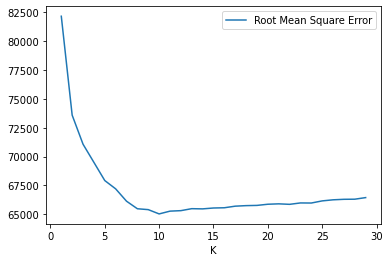

In [49]:
# (5.2) plot learning curve RMSE(error) ~ K
import matplotlib.pyplot as plt
klist=[]
for i in range(len(rmseList)):
    klist.append(i+1)
plotdict={'K':klist, 'Root Mean Square Error':rmseList}


plotdf=pd.DataFrame(plotdict)
plotdf.plot(x='K', y='Root Mean Square Error', kind='line')











# My Observations

The best K for my KNN predictor was 11 with an RMSE of 65269.09324566542. The best K for the SK-Learn KNN predictor was 10 with an RMSE of 65028.57202796875. When graphing the RMSE of different Ks for the SK-Learn predictor, the RMSE drops rapidly when k>10, and then rises slowly when k>10. At their best Ks, the SK-Learn predictor was slightly better.

Linear regression had a higher RMSE (71175.29120266666) than either KNN predictor or DT Regressor. The DT regressor had the highest RMSE (85846.4047837364) of all of the prediction models. The Random Forest had a lower RMSE (61204.82833659057) than any model.

## (6) Summary of k-NN model and Comparison with other models



   
     
        













### (1) First Model: Linear regression

In [50]:
# (a) training model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

In [51]:
# (b) test model
some_data = X_test.iloc[:5]
some_labels = y_test.iloc[:5]


#  compare:
print("Predictions:", lin_reg.predict(some_data))
print("Real Price:", list(some_labels))


Predictions: [278272. 255232. 128768. 207360.  79360.]
Real Price: [280800.0, 127200.0, 162500.0, 145800.0, 128300.0]


In [52]:
### (c) Evaluation with Mean-squared-error

from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(X_test)

lin_mse = mean_squared_error(y_test, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

print(lin_rmse)



71175.29120266666


### (2) Second model: DT regressor

In [53]:
# Second model: DT regressor

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [54]:
housing_predictions = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


85516.81881787728

### (3) Third Model: Random forest


In [55]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [56]:
housing_predictions = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

61721.30249531019

### Summary: Forest is better

## 2.2 Cross-Evaluation
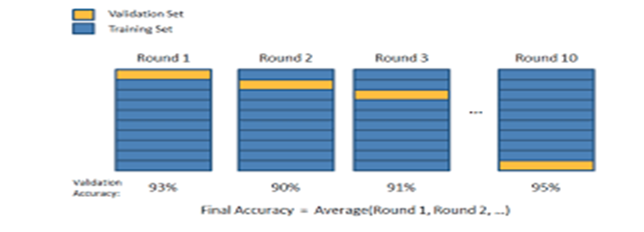

In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [58]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [59]:
display_scores(tree_rmse_scores)

Scores: [82546.98357533 87175.29430731 78961.00597256 85433.95532835
 85593.58886198 92031.16804152 88479.08701817 84618.51804663
 87926.77967942 86098.13056245]
Mean: 85886.45113937183
Standard deviation: 3337.0672980720287


Now the Decision Tree doesn’t look as good as it did earlier. In fact, it seems to perform
worse than the Linear Regression model!

In [60]:
# try linear model
lin_scores = cross_val_score(lin_reg, X_train, y_train,scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [68712.57026271 72332.42597368 70155.33520258 68829.5813055
 68926.39658717 76645.55055199 72226.26641447 71402.48764685
 73644.35770421 72830.90014644]
Mean: 71570.58717955956
Standard deviation: 2394.969586466837


That’s right: the Decision Tree model is overfitting so badly that it performs worse
than the Linear Regression model.

# 2.3 Fine-Tune Your Model
- (skip for now) Grid Search, but you can try it

In [61]:
from sklearn.model_selection import GridSearchCV
param_grid = [  {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
                {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [62]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30)

In [63]:
cvres = grid_search.cv_results_

In [64]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

73002.38465691022 {'max_features': 2, 'n_estimators': 3}
65150.3030517344 {'max_features': 2, 'n_estimators': 10}
62500.81119870783 {'max_features': 2, 'n_estimators': 30}
71337.8361510309 {'max_features': 4, 'n_estimators': 3}
64564.28398817331 {'max_features': 4, 'n_estimators': 10}
61813.65397645561 {'max_features': 4, 'n_estimators': 30}
72293.24839804985 {'max_features': 6, 'n_estimators': 3}
65021.669834963875 {'max_features': 6, 'n_estimators': 10}
62239.00221367955 {'max_features': 6, 'n_estimators': 30}
71672.78201978565 {'max_features': 8, 'n_estimators': 3}
64652.8460236586 {'max_features': 8, 'n_estimators': 10}
62519.461153176715 {'max_features': 8, 'n_estimators': 30}
72844.12143639526 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
64553.81883028267 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
70381.00345899939 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
63712.330458982375 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

# 3. Analyze the Best Models and Their Errors
 - summarize your observations
 - it is not good enough, go back step 2 (features, models, parameter tuning, ..)
 
 - also evaluate the best model of  Your System on the Test Set

In [65]:
# reconsider the feature list: 
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.09560647, 0.07566904, 0.06404251, 0.36810547, 0.09391398,
       0.12457404, 0.01264194, 0.14707087, 0.00038083, 0.00598202,
       0.01201282])

<BarContainer object of 11 artists>

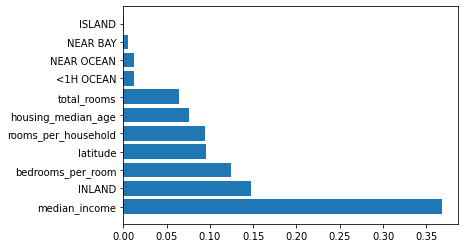

In [66]:
# sort the importance of the features based on the values.
names = X_train.columns
rank_features = sorted(zip(feature_importances, names), reverse=True)
rank, features_names =  zip(*rank_features) # unzip the list

# polt 
plt.barh(features_names, rank)

In [67]:
# this list order is dif. from the book code, because we applied feature selection and combined features

# STEP 4. Launch, Monitor, and Maintain Your System
 - read the book
 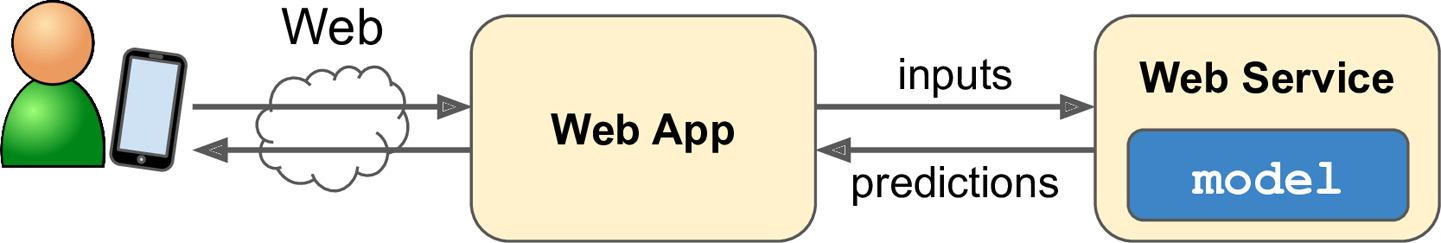

#  read the book chapter 2
-----

# end of the notebook